# Classification Test

In [3]:
import numpy as np
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

Let us show that Random Forest is capable of classifying a well-separated data set.

First, we generate a synthetic dataset with 51 feature and 707 "frames", similar to the dir_changes dataset

In [4]:
rng = np.random.default_rng()

positive = rng.integers(low=0, high=30, size=(472, 51))
negative = rng.integers(low=-30, high=0, size=(235, 51))
synthetic = np.concatenate((positive, negative), axis=0)
labels = np.concatenate((np.zeros(shape=(472, 1)), np.ones(shape=(235, 1))), axis=0)

synthetic

array([[  7,  12,   5, ...,   4,  22,  24],
       [ 14,  19,  10, ...,  18,  27,  20],
       [  0,  14,   9, ...,  12,  29,   6],
       ...,
       [-12,  -4, -21, ...,  -4, -17, -20],
       [-30,  -2,  -5, ...,  -7, -27,  -9],
       [ -6,  -5, -29, ..., -27, -24,  -3]])

Now, let us use UMAP to reduce this synthetic data set so we can visualise it and see if it is really separated.

In [5]:
reducer = umap.UMAP()
reduced_synthetic = reducer.fit_transform(synthetic)

Next, we visualise this reduced form of the synthetic data set to show that it really is separated.

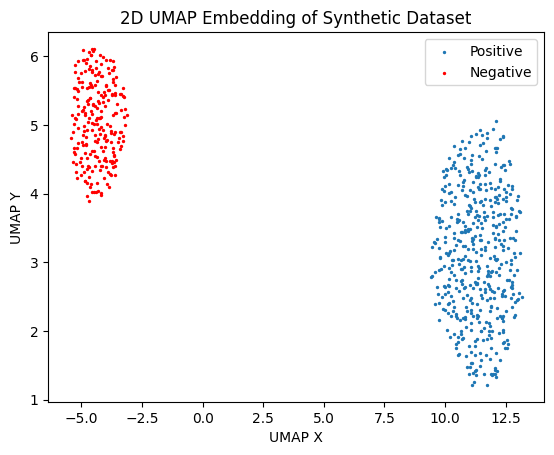

In [6]:
plt.scatter(reduced_synthetic[:472, 0], reduced_synthetic[:472, 1], c="tab:blue", s=2, label="Positive")
plt.scatter(reduced_synthetic[472:, 0], reduced_synthetic[472:, 1], c="red", s=2, label="Negative")
plt.title("2D UMAP Embedding of Synthetic Dataset")
plt.xlabel("UMAP X")
plt.ylabel("UMAP Y")
plt.legend()
plt.show()

Lastly, we perform classification. Shuffle and split the synthetic data set into test and train sets (with an 80:20 split). Feed the training set and labels into a Random Forest classifier, training it. Then classify the test set and compare the predicted labels to the real test set labels.

In [7]:
rf_clf = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(synthetic, labels)

rf_clf.fit(X_train, y_train)

y_predict = rf_clf.predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       119
         1.0       1.00      1.00      1.00        58

    accuracy                           1.00       177
   macro avg       1.00      1.00      1.00       177
weighted avg       1.00      1.00      1.00       177



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


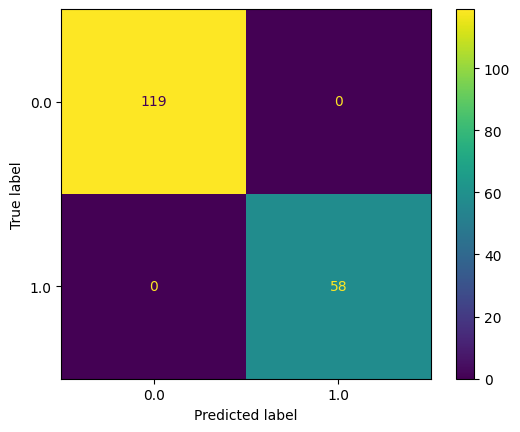

In [9]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

It is also of interest to consider whether providing the classifier model with reduced data would provide better prediction than the full 51-dimensional data set.

In [10]:
rf_clf_reduced = RandomForestClassifier()

X_train_red, X_test_red, y_train, y_test = train_test_split(reduced_synthetic, labels)

rf_clf_reduced.fit(X_train_red, y_train)

y_predict_red = rf_clf_reduced.predict(X_test_red)

print(classification_report(y_test, y_predict_red))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       114
         1.0       1.00      1.00      1.00        63

    accuracy                           1.00       177
   macro avg       1.00      1.00      1.00       177
weighted avg       1.00      1.00      1.00       177



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


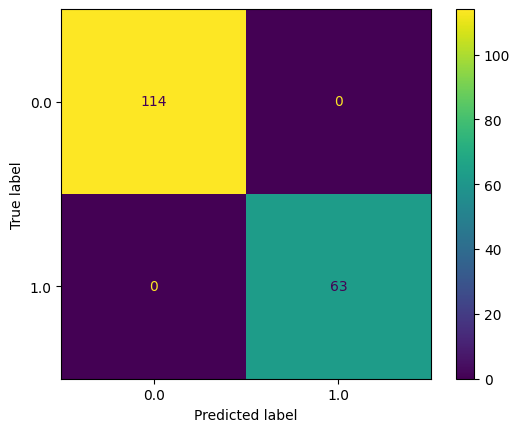

In [11]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_red)